In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
r_77 = np.array([0.70,0.80,0.82,0.84,0.86,0.88,0.90,0.92,0.94,0.96,0.98,1.0])

In [3]:
# new harddisk HDCZ-UT FM2 = 9.2 pN

columns = ['t', 'x', 'y']
tip = []

for t in [0.70,0.80,0.82,0.84,0.86,0.88,0.90,0.92,0.94,0.96,0.98,1.0]:
    #print(round(t,1))
    tipXY = pd.read_csv('v11nData/S77/TipXYt5S77R'+str(round(t,2))+'.txt', names=columns, delim_whitespace=True)
    tip001 = tipXY.drop(['t'], axis=1) # dt = 0.01*1 = 0.01 sec
    tip01 = tip001.iloc[0::10, :] #pick every 9th row starting from the first. Here dt = 0.01*10 = 0.1
    tip.append(tip001)
#tip = np.array([tip])

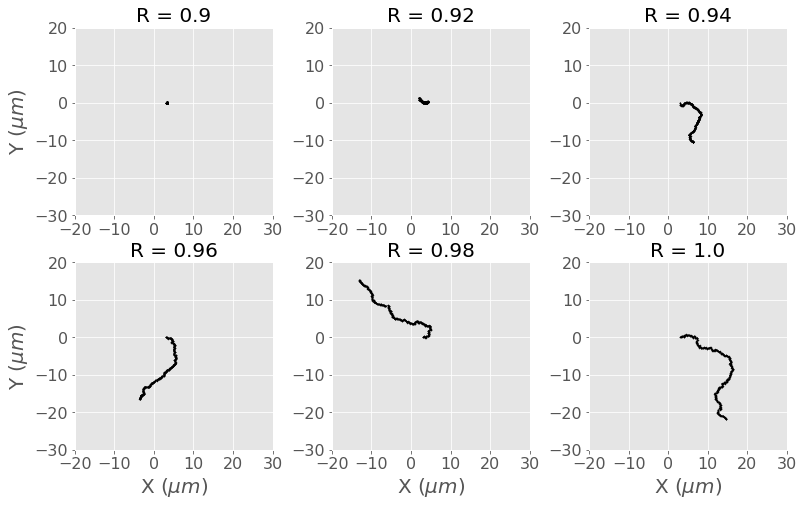

In [20]:
# dt = 0.01 modified
plt.figure(figsize=(4*3.19,4*1.94)) #20,12
plt.style.use('ggplot')

from pylab import *
rc('axes', linewidth=1)

#plt.axis('tight')
#plt.suptitle('Actin Filament Grinding Trajectory [dt = 0.01]', fontsize=18)
#plt.suptitle('Figure 1: Representative shuttle trajectories', y=-0.0001, fontsize=18)
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.25)
plt.axes().set_aspect(aspect = 'equal', adjustable='box')

r = [0.70,0.80,0.82,0.84,0.86,0.88,0.90,0.92,0.94,0.96,0.98,1.0]
count = 1

for p in range(6,12):
    plt.subplot(2,3,count)
    #print(p)
    plt.plot(tip[p]['x'],tip[p]['y'], label='Leading tip', color='black', marker='.', linestyle='-', linewidth=0.5, markersize=1)
    plt.xticks(np.arange(-20,36,step=10),fontsize=16)
    plt.yticks(np.arange(-30,26,step=10),fontsize=16)
    plt.title('R = '+str(r[p]), fontsize=20)
    if p == 6 or p == 9:
        plt.ylabel('Y ($\mu m$)', fontsize=20)
    if p >= 9:
        plt.xlabel('X ($\mu m$)', fontsize=20)
    count += 1

    
#plt.savefig('fig/traj_R090_100t5S77.pdf', format='pdf', dpi=700, bbox_inches='tight')
plt.savefig('fig/traj_R090_100t5S77.svg', format='svg', dpi=700, bbox_inches='tight')

In [22]:
import subprocess
subprocess.call('inkscape fig/traj_R090_100t5S77.svg -M fig/traj_R090_100t5S77.emf', shell=True)

0